Es sabido que, una entidad que presta servicios o productos (pudiera ser una
empresa, un banco, una tienda, etcétera) puede mejorar la experiencia de
cliente desarrollando productos personalizados en pos de las preferencias y
necesidades de cada uno de sus clientes.
El set de datos potencial contiene datos sobre clientes de una institución
financiera:
● Customer ID: ID asociado al cliente
● Age: Edad en años del cliente

● Income: Ingreso anual del cliente
● Family: Tamaño del grupo familiar del cliente
● CCAvg: Cupo promedio mensual utilizado en tarjetas de crédito
● Education: Nivel educacional (1 si no es graduado, 2 graduado y 3 si
posee estudios especializadoss (magister, doctorado, etcétera)
● Mortgage: Monto de la hipoteca (0 indica que no posee)
● ZIP Code: Código postal del domicilio
En la última campaña a cada cliente se le ofreció un producto personalizado
en base a su comportamiento financiero, preferencias, capacidad de pago y
necesidades. La variable target corresponde a Personal Loan el cual indica si el
cliente tomó o no tomó este producto (¿El cliente aceptó o no el producto
ofrecido? ), donde 0 indica que el cliente no adquirió el producto y 1 indica que
sí lo adquirió.
Es de interés analizar cuáles pudieran ser los perfiles de clientes que tienen
mayor probabilidad de aceptar el producto ofrecido, de manera de, identificar
a los clientes con dichas características y priorizarlos a ellos en las próximas
campañas.
a) Cargue el set de datos utilizando la función read.excel de pandas. ¿Qué
columnas le hacen sentido incluir en un modelo para predecir si un cliente
tomará o no el producto ofrecido? Si desea eliminar alguna columna, recuerde
que puede usar la función drop('nombre columna a eliminar', axis=1).
b) Determine cuáles son las variables predictoras que son categorías y obtenga
las variables dummies correspondientes para incluirlas en el modelo.
Recuerde que puede usar la función get_dummies() de pandas.
c) Defina en un objeto X las variables predictoras y en Y la variable respuesta
Personal Loan. Obtenga los set de entrenamiento y prueba en una proporción
5:1. Recuerde que la función train_test_split() es útil para realizar split simple,

además fije una semilla 2021 (random_state=2021 en la función
train_test_split()).
d) Obtenga un árbol de decisión con el set de datos de entrenamiento.
Obtenga el MSE del modelo en el set de prueba. Muestre el árbol obtenido,
¿qué observa? ¿cuáles podrían ser los problemas de este árbol? ¿qué
alternativas pudieran probarse para abordar este problema?
e) Plantee otro árbol de decisión pero definiendo como parámetro de control
o prepoda la profundidad máxima del árbol, para esto en la función
DecisionTreeClassifier() añada como argumento max_depth=2 (profundidad
máxima 2). Obtenga el MSE en el set de prueba y compare con el modelo
anterior. Observe el árbol obtenido. Comente.
f) Busque los mejores valores de los criterios de corte y máxima profundidad
para este caso, con 10 validaciones cruzadas, y entregue sus valores (Hint:
evalue los hiperparámetros criterion y max_depth)

In [1]:
#imports y data inicial
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
df = pd.read_excel('potencial.xlsx').set_index('ID')

df.head()




,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan
ID,,,,,,,,
1,25,49,91107,4,1.6,1,0,0
2,45,34,90089,3,1.5,1,0,0
3,39,11,94720,1,1.0,1,0,0
4,35,100,94112,1,2.7,2,0,0
5,35,45,91330,4,1.0,2,0,0


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0


Viendo la informacion de las columnas al menos para este caso podemmos presindir de la columna zip, sin embargo esta informmacion combinada con el mortage puede darnos un insight si la persona aceptara el producto, el mortage puede variar mucho de un estado a otro y afectar la desicion de la persona, igualente le nivel educacional, esto influye proporcionalmente en el comportamiento financiero de la persona y afectar su decision, sin embargo para la simpleza de este ejercicio vamos a presindir de esas variables

In [3]:
#modificamos en dataframe
df.drop(['ZIP Code', 'Education'], axis=1, inplace=True)
df.head()


,Age,Income,Family,CCAvg,Mortgage,Personal Loan
ID,,,,,,
1,25,49,4,1.6,0,0
2,45,34,3,1.5,0,0
3,39,11,1,1.0,0,0
4,35,100,1,2.7,0,0
5,35,45,4,1.0,0,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1].values, 
                                                    df.iloc[:, -1].values, 
                                                    test_size=0.1,
                                                    random_state=2021)
#arbol sencillo
arbol1 = DecisionTreeClassifier()
arbol1.fit(X_train, y_train)
print(f'Precisión modelo inicial train/test {arbol1.score(X_train, y_train)} <> {arbol1.score(X_test, y_test)}')

Precisión modelo inicial train/test 1.0 <> 0.96


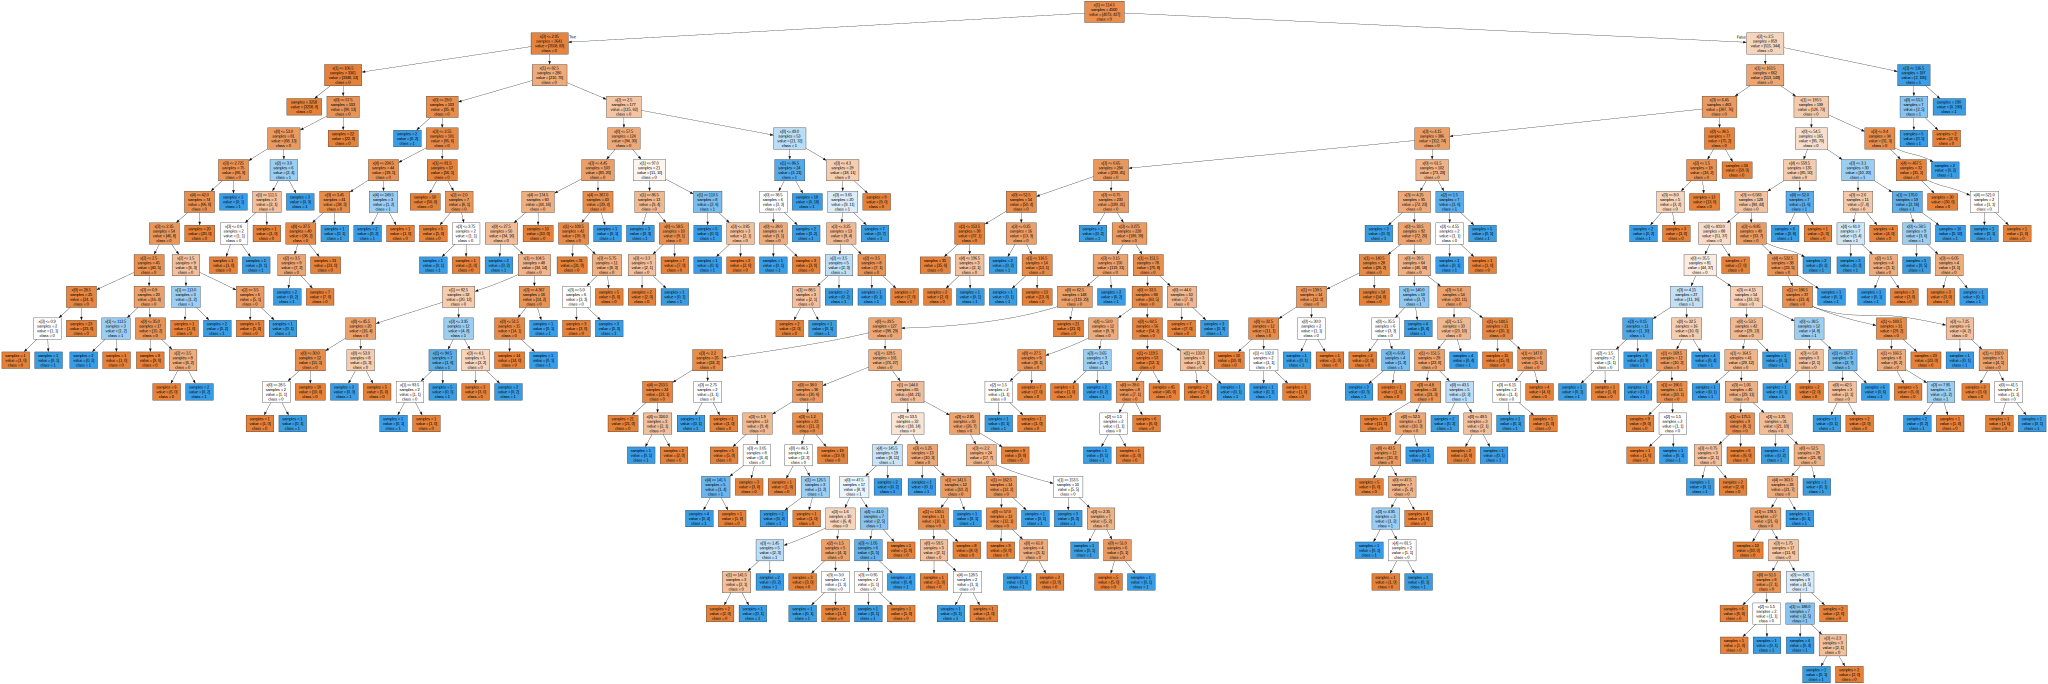

In [5]:
export_graphviz(arbol1, out_file="tree.dot", class_names=["0", "1"],impurity=False, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)